In [1]:
import tensorflow as tf
import Nets.SiameseNet as sNet
import Nets.SiameseMetric as mNet
from lib import loader
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc
def load_mnet(sess=None):
    if sess is None:
        sess = tf.Session()
    net,saver = mNet.runInit(mNet.backup8Net)
    mNet.runRestore(sess,saver,"/home/jan/Desktop/Cuneiform/savedNets/SiameseMetricBackup8_30k+_120000.ckpt")
    return net,sess
    

def load_net():
    
    sess = tf.Session()
    net,saver = sNet.runInit(sNet.backup4Net)
    sNet.runRestore(sess,saver,"/home/jan/Desktop/Cuneiform/savedNets/SiameseBackup4_2_fin.ckpt")
    
    return net,sess

def get_loader(px=48):
    oLoad = loader.OmniGlotLoader(px)
    return oLoad

In [3]:
oLoad = get_loader(px=48)

Loading Omniglot Data


Loading took 27.4588689804 seconds


In [2]:
#net,sess = load_net()
metNet, sess = load_mnet()

In [19]:
lang_num=3
lang = oLoad.testing_samples[lang_num]
chars = []
num_chars=5
start_char=2
num_examples=20
for i in lang[start_char:start_char+num_chars]:
    chars.extend(i[0:num_examples])

scores = np.array(metNet.calc_dist_mat(sess,chars, batchsize=50))
#scores+=0.001
from sklearn import manifold
from mpl_toolkits.mplot3d import Axes3D
mds = manifold.MDS(n_components=2, metric=True)
nPos = mds.fit_transform(scores)

In [20]:
%matplotlib qt
import matplotlib.pyplot as plt
cols = {}
cols[1]="r"
cols[2]="g"
cols[3]="b"
cols[4]="black"
cols[5]="y"

plt.scatter(nPos[:,0],nPos[:,1],c=[cols[1+int(i/(num_examples))] for i in range(num_examples*num_chars)])
plt.show()

In [20]:
x1,x2,y = oLoad.get_training_sample(100,p_same=1,testing_set=True)
enc1,enc2,y_pred_same = sess.run([net.enc1,net.enc2, net.y_pred],feed_dict={net.x1:x1, net.x2:x2})
enc_diff = abs(enc1-enc2)

In [22]:
x1,x2,y = oLoad.get_training_sample(100,p_same=0,testing_set=True)
enc1,enc2,y_pred_diff = sess.run([net.enc1,net.enc2, net.y_pred],feed_dict={net.x1:x1, net.x2:x2})
enc_diff_2 = abs(enc1-enc2)

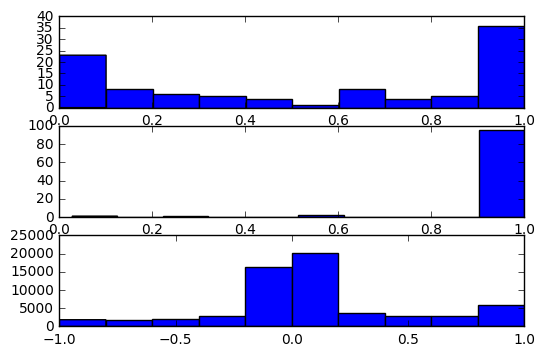

In [23]:
ind = 11
plt.subplot(311)
plt.hist(y_pred_same)
plt.subplot(312)
plt.hist(y_pred_diff)
plt.subplot(313)
plt.hist(np.reshape(enc_diff_2-enc_diff,(-1)))
plt.show()

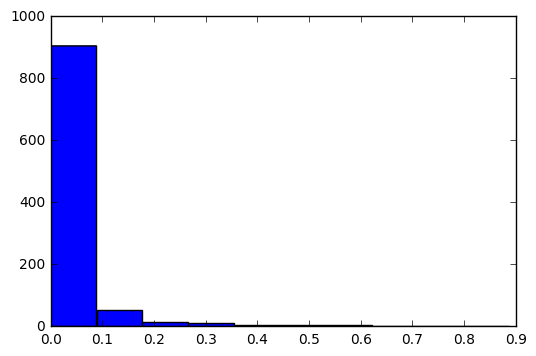

In [53]:
plt.hist(y_pred_same)
plt.show()

In [5]:
x1,x2,y = oLoad.get_testing_sample(100,testing_set=False)
preds=[]
e=0
for i in range(10000):
    enc1,enc2,y_pred_same = sess.run([net.enc1,net.enc2, net.y_pred],feed_dict={net.x1:x1[i], net.x2:x2[i]})
    e+= (np.argmin(y_pred_same[:,0])== y[i])
    preds.extend(y_pred_same[:,0])
print e

9961


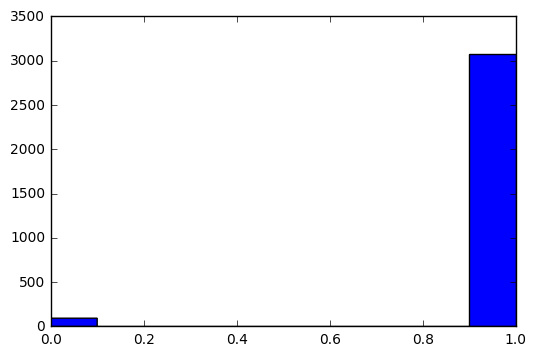

In [11]:
plt.hist(preds)
plt.show()

In [8]:
print preds

[0.99999988, 0.99999917, 1.0, 0.00037777616, 0.99995482, 1.0, 0.99999762, 1.0, 1.0, 0.99990952, 1.0, 0.99996769, 1.0, 1.0, 1.0, 0.99986708, 0.99999702, 0.99998152, 0.99999845, 0.99999857, 1.0, 0.99987996]


[1, 2, 'Fizz', 4, 'Buzz', 'Fizz', 7, 8, 'Fizz', 'Buzz', 11, 'Fizz', 13, 14, 'FizzBuzz', 16, 17, 'Fizz', 19, 'Buzz', 'Fizz', 22, 23, 'Fizz', 'Buzz', 26, 'Fizz', 28, 29, 'FizzBuzz', 31, 32, 'Fizz', 34, 'Buzz', 'Fizz', 37, 38, 'Fizz', 'Buzz', 41, 'Fizz', 43, 44, 'FizzBuzz', 46, 47, 'Fizz', 49, 'Buzz']


hallowelt
